In [2]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [3]:
# Global Variables
stock_name = 'aapl' # ticker symbol
model_name = 'Random Forest Classifier' # for display later
days_ahead = 1 # for predicting 1 day ahead
cv = 5 # number of cross validation folds

In [4]:
# Extract, Transform, Load, and Train Test Split
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, '12/12/1980', days_ahead)

In [24]:
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.779999,0.022083,0.040909,-0.020904,0.012500,-0.002059,1,1,0.011989
2020-12-10,123.870003,120.150002,120.500000,123.239998,81312200.0,123.239998,-0.022739,0.030961,0.011989,0.014027,0.000567,-1,-1,0.006735
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.410004,0.000163,0.018333,-0.006735,0.014159,0.000342,1,-1,0.005147
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.779999,0.006688,0.014892,-0.005147,0.012541,-0.003141,1,1,0.050090
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.879997,-0.028470,0.030371,0.050090,0.027340,0.005859,-1,-1,0.000547
2020-12-16,128.369995,126.559998,127.410004,127.809998,98208600.0,127.809998,-0.003139,0.014301,-0.000547,0.023621,0.009930,1,-1,-0.006963
2020-12-17,129.580002,128.039993,128.899994,128.699997,94359800.0,128.699997,0.001552,0.012028,0.006963,0.023619,0.008925,-1,1,-0.015851
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004,0.017835,0.023628,-0.015851,0.025414,0.007102,1,1,0.012395
2020-12-21,128.309998,123.449997,125.019997,128.229996,120093700.0,128.229996,-0.025676,0.039368,0.012395,0.024494,0.010610,1,-1,-0.036419


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
# a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)

In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

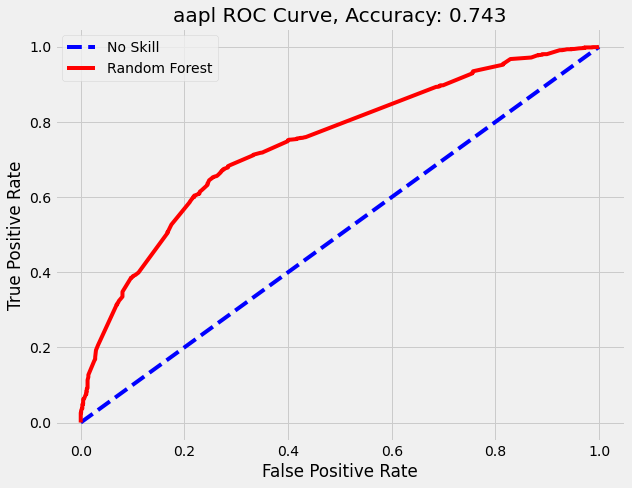

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, 'Random Forest')

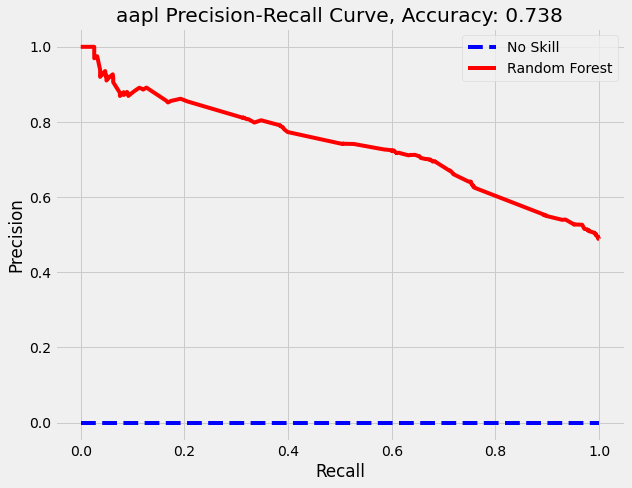

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, 'Random Forest')

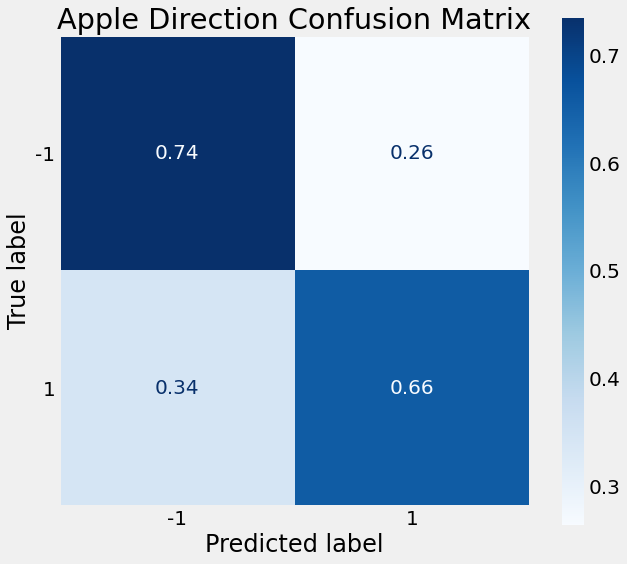

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, 'Apple')

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.6916152741341806'

In [11]:
# Prediction
stock_df.iloc[-1]

High          1.344050e+02
Low           1.304000e+02
Open          1.316100e+02
Close         1.329000e+02
Volume        6.761636e+07
Adj Close     1.329000e+02
oc           -9.801636e-03
hl            3.071323e-02
adj           3.641892e-02
5stdev_adj    1.916943e-02
5sma_adj      7.875911e-03
direction    -1.000000e+00
Name: 2020-12-22 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-1]
last

oc           -0.009802
hl            0.030713
5stdev_adj    0.019169
5sma_adj      0.007876
Name: 2020-12-22 00:00:00, dtype: float64

In [13]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name}')
else:
    print(f'Sell or hold {stock_name}')

Sell or hold aapl


In [14]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [15]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-16,128.369995,126.559998,127.410004,127.809998,98208600.0,127.809998,-0.003139,0.014301,-0.000547,0.023621,0.009930,1,-1,-0.006963
2020-12-17,129.580002,128.039993,128.899994,128.699997,94359800.0,128.699997,0.001552,0.012028,0.006963,0.023619,0.008925,-1,1,-0.015851
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004,0.017835,0.023628,-0.015851,0.025414,0.007102,1,1,0.012395
2020-12-21,128.309998,123.449997,125.019997,128.229996,120093700.0,128.229996,-0.025676,0.039368,0.012395,0.024494,0.010610,1,-1,-0.036419
2020-12-22,134.404999,130.399994,131.610001,132.899994,67616362.0,132.899994,-0.009802,0.030713,0.036419,0.019169,0.007876,-1,-1,-0.000000


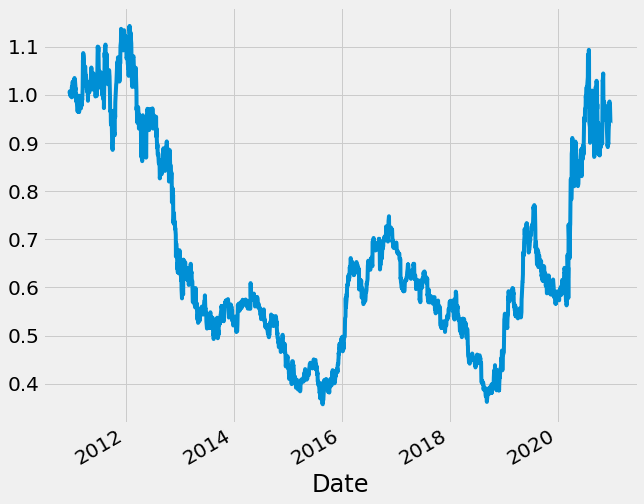

In [16]:
# Don't trade every day!
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot();

In [17]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

4.34503385434642

In [18]:
# multiple times original investment, not bad but...

In [19]:
# If purchased in 2012 and left it until now
(stock_df['Close'][-1] - stock_df['Close'][-2522]) /stock_df['Close'][-2522]

10.58350155109452

In [20]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/